In [105]:
%config IPCompleter.greedy=True
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data Preparation

## Importing Minst Dataset

In [124]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


In [125]:
print(f' image dataset {mnist.data.shape}') #data contains images that have a pixel value from 0 to 16 (0 is white, 16 is blakc)
print(f' images as 28x28 table {mnist.target.shape}')

 image dataset (70000, 784)
 images as 28x28 table (70000,)


## Extracting partition of Dataset and Preparing the data

In [126]:
from sklearn import preprocessing

X = mnist.data[::50, :]
y = mnist.target[::50]

X_norm = preprocessing.scale(X) 

## Visualizing an Image

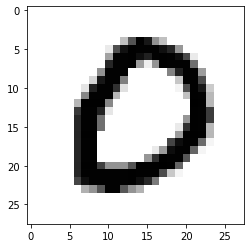

In [127]:
sample_idx = 42
sample_image = np.reshape(X[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')

# Data exploration

## Using Kmean with clusters

In [128]:
from sklearn import cluster, metrics

km10 = cluster.KMeans(10) 
km10.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

_Reducing dimensions_

In [129]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, init='pca')
X_tsne = tsne.fit_transform(X_norm)


_Plotting clustering results with TSNE dimensional reduction_

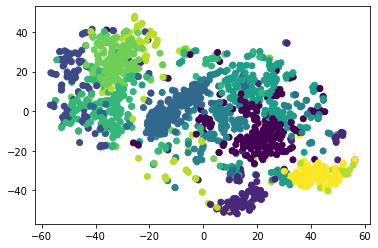

In [130]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=km10.labels_)

Silhouette score

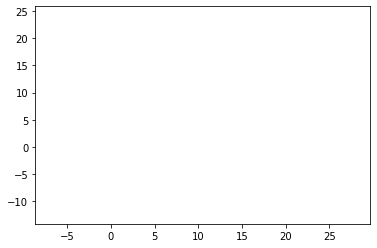

In [134]:
plt.figure()

for i in range(X.shape[0],50):
    plt.text(X_tsne[i,0], X_tsne[i,1], 
        str("%d" % y[i]))
    
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

plt.show()

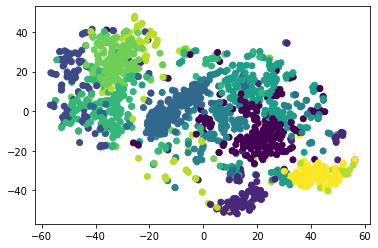

In [135]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=km10.labels_)

_Plotting clustering results with TSNE dimensional reduction_

In [ ]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, init='pca')
X_tsne = tsne.fit_transform(X_norm)


_Reducing dimensions_

In [ ]:
from sklearn import cluster, metrics

km10 = cluster.KMeans(10) 
km10.fit(X)

In [133]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km10.labels_))

print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, km10.labels_))

Silhouette Coefficient: 0.062
Adjusted Rand Index: 0.374
